In [1]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


In [2]:
#import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#load in the dataset
df_show = pd.read_csv('clean_appointments.csv')
df_show.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show,age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,old
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,adult
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,old
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,adult


In [4]:
df_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110526 entries, 0 to 110525
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110526 non-null  float64
 1   appointmentid   110526 non-null  int64  
 2   gender          110526 non-null  object 
 3   scheduledday    110526 non-null  object 
 4   appointmentday  110526 non-null  object 
 5   age             110526 non-null  int64  
 6   neighbourhood   110526 non-null  object 
 7   scholarship     110526 non-null  int64  
 8   hipertension    110526 non-null  int64  
 9   diabetes        110526 non-null  int64  
 10  alcoholism      110526 non-null  int64  
 11  handcap         110526 non-null  int64  
 12  sms_received    110526 non-null  int64  
 13  show            110526 non-null  object 
 14  age_group       110526 non-null  object 
dtypes: float64(1), int64(8), object(6)
memory usage: 12.6+ MB


## Fix data type issue
> The dataset has previously been cleaned, but it's data type formatting was lost in converting from a dataframe to CSV, so I'll perform data type transformation on the new dataset

In [5]:
df_show['patientid'] = df_show['patientid'].astype('str')
type(df_show['patientid'][0])

str

In [6]:
df_show['appointmentid'] = df_show['appointmentid'].astype('str')
type(df_show['appointmentid'][0])

str

##### fix problem with scheduled day and appointment day

In [7]:
#convert feature to datetime for easy manipulation of data
df_show.scheduledday = pd.to_datetime(df_show.scheduledday)

In [8]:
df_show.appointmentday = pd.to_datetime(df_show.appointmentday)

##### convert categorical variables from other types to category

In [9]:
cat_var = ['gender','scholarship','hipertension',
          'diabetes', 'alcoholism', 'handcap',
          'sms_received', 'show']

In [10]:
for val in cat_var:
    df_show[val] = df_show[val].astype('category')

### Analysis 3: What percentage of persons showed up during the period that the research lasted?

In [11]:
df_show.shape

(110526, 15)

In [12]:
total = df_show['show'].value_counts().values.sum()

Text(0.5,1,'Plot of the percentage of Patients that attended vs those Absent')

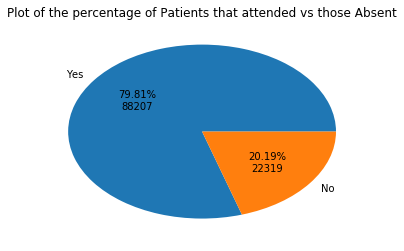

In [14]:
def fmt(x):
    return '{:.2f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(df_show['show'].value_counts().values, labels=df_show['show'].value_counts().index, autopct=fmt);
plt.title('Plot of the percentage of Patients that attended vs those Absent')

###### From the above, we see that:

> 79.81% of persons showed up during the entire phase of the research.

> 20.19% of persons didn't keep their appointment with the medical personnel.